# **Impactos da Inovação e da Liberdade Econômica na Renda Per Capita: Uma Análise Regressiva**

## A amostra está bastante diversa, contando com a seguinte quantidade de países por continente: América: 21, Europa: 44, Oceania: 2, África: 30 e Ásia: 32 países.

## Lembrando: os dados de Renda per capita aqui utilizados são o PIB per Capita por Paridade do Poder de Compra.
## o PIB per Capita PPC calcula o "valor de todos os finais de bens e serviços produzidos no âmbito de uma nação em determinado ano dividido pela população média para o mesmo ano."
## - Coréia do Norte: A última estimativa desse dado para esse país é de 2015. Considerando que ele vem tendo resultados econômicos péssimos no últims anos, preferi utilizar desse dado estimado em 2015 mesmo.

### Bibliotecas

In [ ]:
import pandas as pd
import gspread
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import statsmodels.api as sm

#Acessar a planilha com os dados dos países

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1pKewi3DlY2hadaFdPWB8KSfu7MSK6XFA/export?format=csv"
dados = pd.read_csv(url)

In [ ]:
dados


,country,xI,xL,Y,continente
0,Switzerland,67.6,83.0,83598,Europa
1,Sweden,64.2,77.5,64578,Europa
2,United States,63.5,70.1,76399,América do Norte
3,United Kingdom,62.4,68.6,54603,Europa
4,Singapore,61.5,83.5,127565,Ásia
...,...,...,...,...,...
124,Uruguay,30.0,69.8,28842,América do Sul
125,Armenia,28.0,64.9,18942,Europa
126,Argentina,28.0,49.9,26505,América do Sul
127,Benin,16.0,57.7,4056,África


In [ ]:
#Ajeitando os dados para evitar problemas:

#Converter a coluna Y, renda per capita, para numérico
dados['Y'] = pd.to_numeric(dados['Y'], errors='coerce').round()

# Remover a coluna Unnamed, se existir
dados = dados.loc[:, ~dados.columns.str.contains('^Unnamed')]



---



In [ ]:
# quero somar quantos países eu tenho na amostra por continente:
paises_por_continente = dados.groupby('continente')['country'].count()
print(paises_por_continente)

continente
América Central        8
América do Central     1
América do Norte       3
América do Sul         9
Europa                44
Oceania                2
África                30
Ásia                  32
Name: country, dtype: int64


## Visualizar os dados

## Inovação vs Renda por país

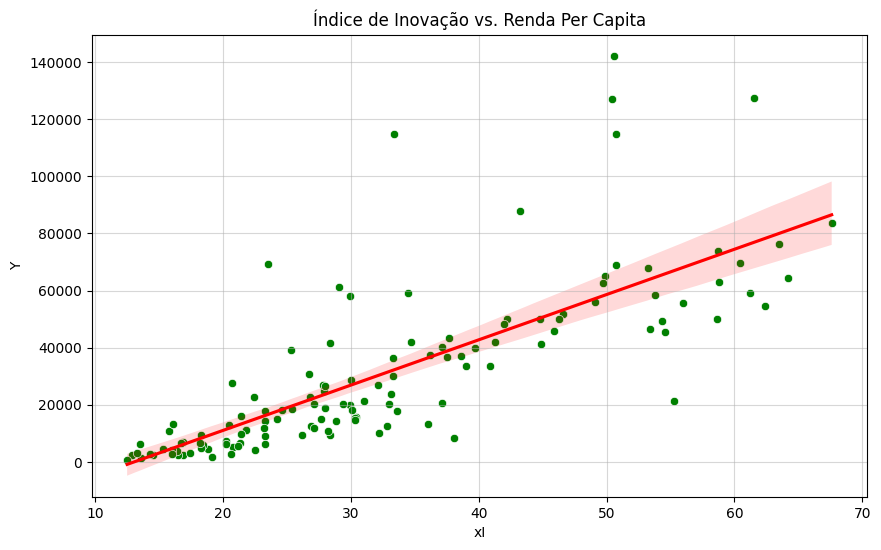

In [ ]:
# Visualizar xI vs Y em um gráfico de dispersão feito no seaborn
plt.figure(figsize=(10, 6))

sns.scatterplot(x='xI', y='Y', data=dados, color = 'green')

plt.title('Índice de Inovação vs. Renda Per Capita')
plt.xlabel('Inovação')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.5)

# Adicionando uma linha de tendência
sns.regplot(x='xI', y='Y', data=dados, scatter=False, color='red')

plt.show()

## Liberdade econômica vs Renda por país

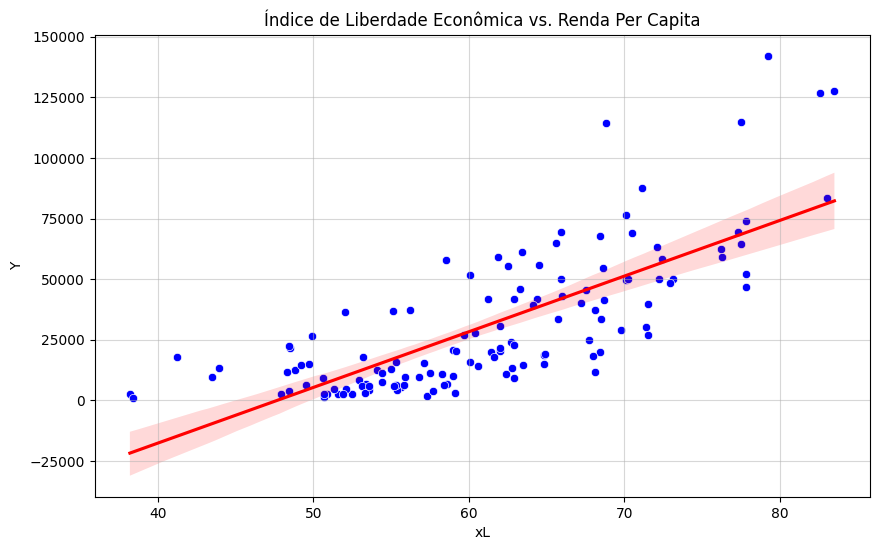

In [ ]:
# Visualizar xL vs Y em um gráfico de dispersão feito no seaborn
plt.figure(figsize=(10, 6))

sns.scatterplot(x='xL', y='Y', data=dados, color = 'blue')
plt.title('Índice de Liberdade Econômica vs. Renda Per Capita')
plt.xlabel('Liberdade Econômica')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.5)
# Adicionando uma linha de tendência
sns.regplot(x='xL', y='Y', data=dados, scatter=False, color='red')

plt.show()

## Inovação vs Liberdade econômica por país

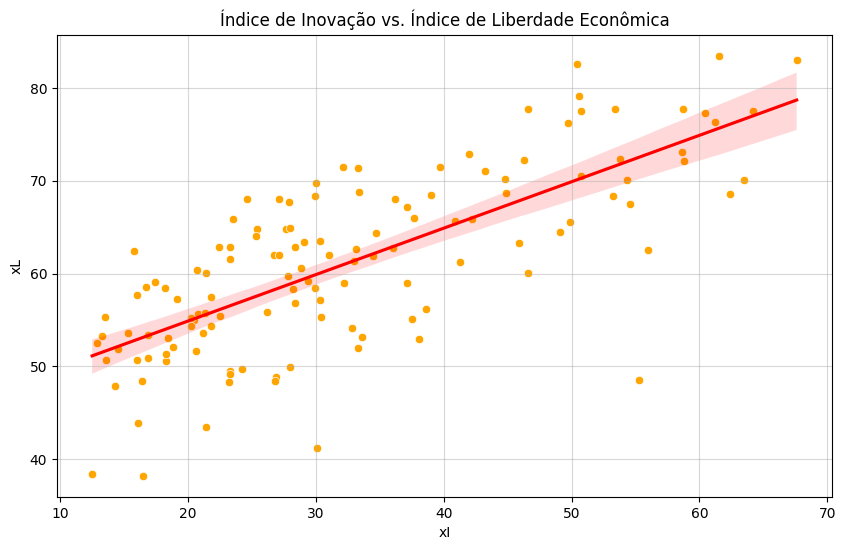

In [ ]:
# Visualizar xI vs xL em um gráfico de dispersão feito no seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='xL', data=dados, color = 'orange')
plt.title('Índice de Inovação vs. Índice de Liberdade Econômica')
plt.grid(True, alpha = 0.5)
plt.xlabel('Inovação')
plt.ylabel('Liberdade Econômica')
#Adicionando uma linha de tendência
sns.regplot(x='xI', y='xL', data=dados, scatter=False, color='red')
plt.show()



---





---



## Vou calcular algumas estatísticas interessantes com esses dados:

## 1. Estatísticas Descritivas

In [ ]:
# 1. Estatísticas Descritivas:
estatisticas_descritivas = dados[['Y', 'xI', 'xL']].describe()
estatisticas_descritivas_por_continente = dados.groupby('continente')[['Y', 'xI', 'xL']].describe()
print("Estatísticas Descritivas da amostra:")
print(estatisticas_descritivas)
print()
print()
print("Estatísticas Descritivas por Continente:")
print(estatisticas_descritivas_por_continente)

Estatísticas Descritivas da amostra:
                   Y          xI          xL
count     129.000000  129.000000  129.000000
mean    31129.937984   32.655814   61.222481
std     28960.040757   14.108840    9.546156
min       836.000000   12.500000   38.200000
25%      9519.000000   21.400000   54.100000
50%     20377.000000   29.400000   61.400000
75%     48397.000000   42.000000   68.100000
max    142214.000000   67.600000   83.500000


Estatísticas Descritivas por Continente:
                       Y                                                 \
                   count          mean           std      min       25%   
continente                                                                
América Central      8.0  17416.625000  11841.800852   6741.0   9832.25   
América do Central   1.0  22834.000000           NaN  22834.0  22834.00   
América do Norte     3.0  52103.666667  27979.966982  21512.0  39956.00   
América do Sul       9.0  19688.444444   7308.577959   9684.0  15

## Maiores e menores índices de inovação da amostra:

In [ ]:
#Calcular o maior valor da coluna xI (maior índice de inovação)
dados[dados['xI'] == dados['xI'].max()]
print("Dados do país com o maior índice de inovação:")
print(dados[dados['xI'] == dados['xI'].max()])

Dados do país com o maior índice de inovação:
       country    xI    xL      Y continente
0  Switzerland  67.6  83.0  83598     Europa


In [ ]:
# calcular o menor valor da coluna xI
menor_valor = dados['xI'].min()

# encontrar o país com o menor valor da coluna xI
print('Dados do país com omenor índice de inovação da amostra:')
print(dados[dados['xI'] == dados['xI'].min()])

Dados do país com omenor índice de inovação da amostra:
    country    xI    xL    Y continente
84  Burundi  12.5  38.4  836     África


## Maiores e menores índices de liberdade econômica da amostra:

In [ ]:
#Calculando os maiores e os menores índices de inovação e liberdade econômica das amostra:
dados[dados['xL'] == dados['xL'].max]
print("Dados do país com o maior índice de liberdade econômica:")
print(dados[dados['xL'] == dados['xL'].max()])
print()
print()
dados[dados['xL'] == dados['xL'].min()]
print("Dados do país com o menor índice de liberdade econômica:")
print(dados[dados['xL'] == dados['xL'].min()])

Dados do país com o maior índice de liberdade econômica:
     country    xI    xL       Y continente
4  Singapore  61.5  83.5  127565       Ásia


Dados do país com o menor índice de liberdade econômica:
     country    xI    xL     Y continente
81  Zimbabwe  16.5  38.2  2531     África


## 2. Média e Mediana de Renda per capita



In [ ]:
# 2. Média e Mediana de Y
media_Y = dados['Y'].mean()
mediana_Y = dados['Y'].median()
media_Y_por_continente = dados.groupby('continente')['Y'].mean()
mediana_Y_por_continente = dados.groupby('continente')['Y'].median()

print("Média da Renda per capita da amostra:", media_Y)
print("Mediana da Renda per capita da amostra:", mediana_Y)
print()
print()
print("Média da Renda per capita por Continente:")
print(round(media_Y_por_continente))
print()
print()
print("Mediana da Renda per capita por Continente:")
print(mediana_Y_por_continente)

Média da Renda per capita da amostra: 31129.937984496122
Mediana da Renda per capita da amostra: 20377.0


Média da Renda per capita por Continente:
continente
América Central       17417.0
América do Central    22834.0
América do Norte      52104.0
América do Sul        19688.0
Europa                49012.0
Oceania               57296.0
África                 6942.0
Ásia                  32523.0
Name: Y, dtype: float64


Mediana da Renda per capita por Continente:
continente
América Central       11459.0
América do Central    22834.0
América do Norte      58400.0
América do Sul        17822.0
Europa                44547.0
Oceania               57296.0
África                 4308.5
Ásia                  16364.0
Name: Y, dtype: float64




---



## **Medindo a renda per capita média dos países com índice de inovação acima da média e comparar com os de índice abaixo da média:**

## Visualizar os dados de toda a amostra:

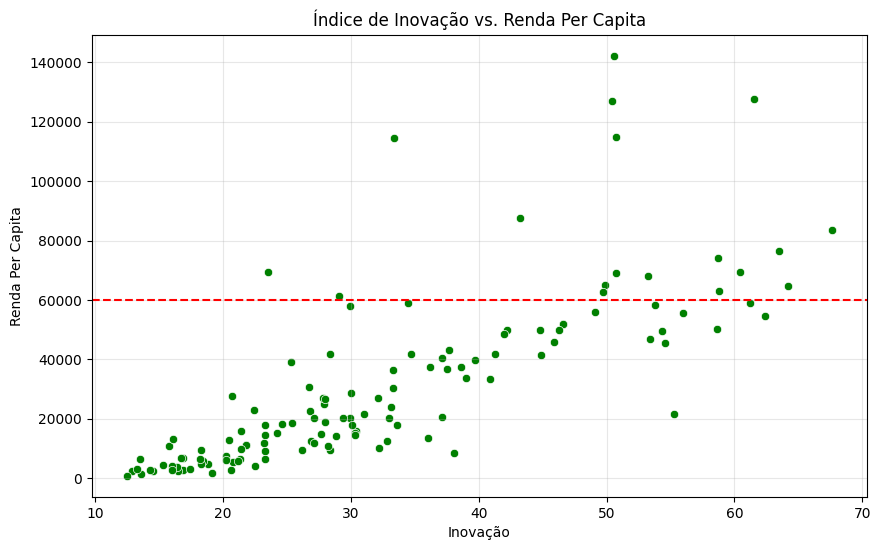

In [ ]:
#vou montar um gráfico com os dados de xI e Y
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=dados, color = 'green')
plt.title('Índice de Inovação vs. Renda Per Capita')
plt.xlabel('Inovação')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)
#linha constante na faixa de renda de 30 mil
plt.axhline(y=60000, color='red', linestyle='--')
plt.show()

## A maioria dos países da amostra têm renda per capita ppp abaixo da faixa dos US$60 mil.

## Países com índice de inovação abaixo da média:

In [ ]:
print('Média de inovação pelo mundo:')
print(dados['xI'].mean())
print()
print()
abaixo_da_medI = dados[dados['xI'] < dados['xI'].mean()]
print("Países com índice de inovação abaixo da média:")
print(abaixo_da_medI)

Média de inovação pelo mundo:
32.65581395348837


Países com índice de inovação abaixo da média:
         country    xI    xL      Y       continente
54   Philippines  32.2  59.0  10133             Ásia
55     Mauritius  32.1  71.5  26906           África
56        Kuwait  29.9  58.5  58056             Ásia
57       Georgia  29.9  68.4  20113           Europa
58    Costa Rica  27.9  67.7  24923  América Central
..           ...   ...   ...    ...              ...
124      Uruguay  30.0  69.8  28842   América do Sul
125      Armenia  28.0  64.9  18942           Europa
126    Argentina  28.0  49.9  26505   América do Sul
127        Benin  16.0  57.7   4056           África
128       Uganda  16.0  50.7   2694           África

[75 rows x 5 columns]


## Países com índice de inovação acima da média

In [ ]:
acima_da_medI = dados[dados['xI'] > dados['xI'].mean()]
print("Países com índice de inovação acima da média:")
print(acima_da_medI)

Países com índice de inovação acima da média:
                 country    xI    xL       Y        continente
0            Switzerland  67.6  83.0   83598            Europa
1                 Sweden  64.2  77.5   64578            Europa
2          United States  63.5  70.1   76399  América do Norte
3         United Kingdom  62.4  68.6   54603            Europa
4              Singapore  61.5  83.5  127565              Ásia
5                Finland  61.2  76.3   59027            Europa
6            Netherlands  60.4  77.3   69577            Europa
7                Germany  58.8  72.1   63150            Europa
8                Denmark  58.7  77.8   74005            Europa
9            South Korea  58.6  73.1   50070              Ásia
10                France  56.0  62.5   55493            Europa
11                 China  55.3  48.5   21476              Ásia
12                 Japan  54.6  67.5   45573              Ásia
13                Israel  54.3  70.1   49509              Ásia
14       

## Vamos calcular a renda média dos países com índice de inovação abaixo da média:

In [ ]:
renda_media_abaixo_da_medI = abaixo_da_medI['Y'].mean()
print("Renda média dos países com índice de inovação abaixo da média: US$",round(renda_media_abaixo_da_medI))

Renda média dos países com índice de inovação abaixo da média: US$ 14544


## Vamos fazer o mesmo com os países com inovação acima da média:

In [ ]:
acima_da_medI_renda_media = acima_da_medI['Y'].mean()
print("Renda média dos países com índice de inovação acima da média: US$", round(acima_da_medI_renda_media))

Renda média dos países com índice de inovação acima da média: US$ 54166


## Diferença percentual de renda entre esses países

In [ ]:
diferença = (round(acima_da_medI_renda_media) - round(renda_media_abaixo_da_medI))/round(acima_da_medI_renda_media)
percenteI = round(diferença * 100)
print("Diferença percentual média de renda entre os países com o índice de inovação acima da média para os países com índice de inovação abaixo da média:",percenteI,'%')

Diferença percentual média de renda entre os países com o índice de inovação acima da média para os países com índice de inovação abaixo da média: 73 %


## veja que existe uma diferença muito grande entre a renda dos países com melhor desempenho em inovação, para os de pior desempenho.

## Quero visualizar os dados de renda vs inovação para cada grupo:

## Gráfico dos países com melhor desempenho em inovação:

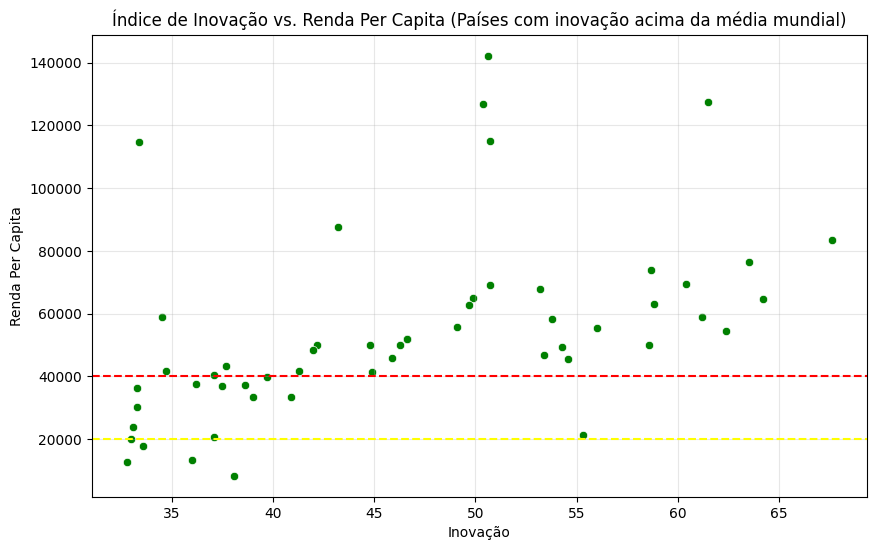

In [ ]:
# Gráfico dos países com melhor desempenho em inovação:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=acima_da_medI, color = 'green')
plt.title('Índice de Inovação vs. Renda Per Capita (Países com inovação acima da média mundial)')
plt.xlabel('Inovação')
plt.ylabel('Renda Per Capita')

#vou colocar uma linha constante na faixa de renda per capita de US$ 40 mil
plt.axhline(y=40000, color='red', linestyle='--')

#vou colocar outra linha na faixa dos US$20 mil
plt.axhline(y=20000, color='yellow', linestyle='--')
plt.grid(True, alpha = 0.3)
plt.show()

## Veja que a maioria desses países estão com renda acima dos US$ 40 mil (acima da linha tracejada em vermelha)

## Além disso, que apenas quatro deles possuem renda abaixo da faixa dos US$20 mil (linha tracejada em amarelo)

## Inovação vs. Renda per Capita: visualizando isso para países com menor inovação

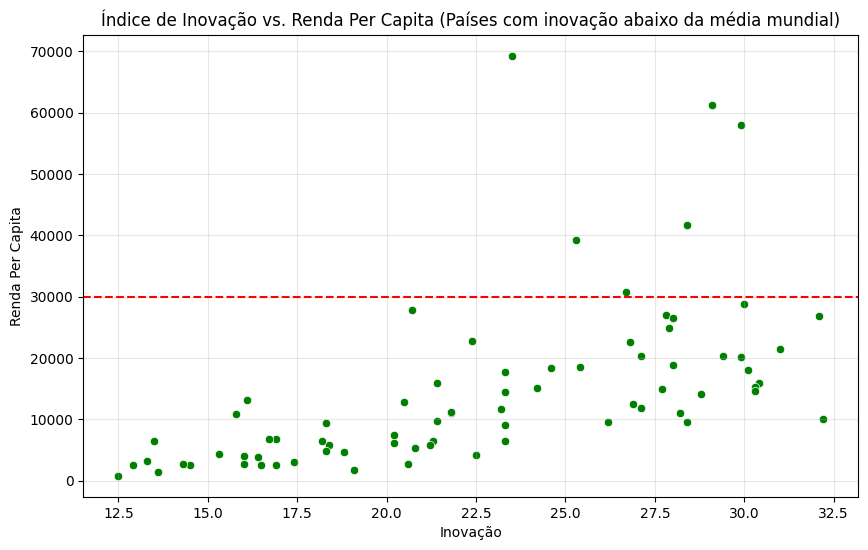

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xI', y='Y', data=abaixo_da_medI, color = 'green')
plt.title('Índice de Inovação vs. Renda Per Capita (Países com inovação abaixo da média mundial)')
plt.xlabel('Inovação')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha constante na faixa de renda per capita de US$ 40 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

In [ ]:
#vou calcular os países com Y acima do 30000 do grupo de países abaixo_da_medI
print('Países com inovação abaixo da média, mas com elevada renda per capita:')
print(abaixo_da_medI[abaixo_da_medI['Y'] > 30000])

Países com inovação abaixo da média, mas com elevada renda per capita:
        country    xI    xL      Y       continente
56       Kuwait  29.9  58.5  58056             Ásia
72   Kazakhstan  26.7  62.0  30810             Ásia
78       Brunei  23.5  65.9  69275             Ásia
87         Oman  28.4  62.9  41724             Ásia
98       Panama  25.3  64.1  39280  América Central
118     Bahrain  29.1  63.4  61228             Ásia


## A semelhança entre eles? São todos, com o excessão de Omã e o Panamá, grandes produtores de petróleo! O petróleo tem compensado a falta de inovação desses países.

## Conclusão da relação entre Inovação e Renda:
## - países com índice de inovação acima da média são mais ricos!
## - países sem grandes reservas de petróleo precisam ser inovadores, caso contrário dificilmente conseguem ter um grande Pib per Capita



---



## Vou fazer a mesma análise anterior agora considerando a Liberdade Econômica:

## Países com índice de liberdade econômica abaixo da média:

In [ ]:
abaixo_da_medL = dados[dados['xL'] < dados['xL'].mean()]
print("Países com índice de liberdade econômica abaixo da média:")
print(abaixo_da_medL)

Países com índice de liberdade econômica abaixo da média:
        country    xI    xL      Y      continente
11        China  55.3  48.5  21476            Ásia
24        Italy  46.6  60.1  51865          Europa
33      Hungary  41.3  61.2  41907          Europa
37      Türkiye  38.6  56.2  37274          Europa
38        India  38.1  52.9   8379            Ásia
..          ...   ...   ...    ...             ...
121  Madagascar  19.1  57.3   1774          África
122     Algeria  16.1  43.9  13210          África
126   Argentina  28.0  49.9  26505  América do Sul
127       Benin  16.0  57.7   4056          África
128      Uganda  16.0  50.7   2694          África

[64 rows x 5 columns]


## Países com liberdade econômica acima da média:

In [ ]:
acima_da_medL = dados[dados['xL'] > dados['xL'].mean()]
print("Países com índice de liberdade econômica acima da média:")
print(acima_da_medL)

Países com índice de liberdade econômica acima da média:
                    country    xI    xL       Y        continente
0               Switzerland  67.6  83.0   83598            Europa
1                    Sweden  64.2  77.5   64578            Europa
2             United States  63.5  70.1   76399  América do Norte
3            United Kingdom  62.4  68.6   54603            Europa
4                 Singapore  61.5  83.5  127565              Ásia
..                      ...   ...   ...     ...               ...
119  Bosnia and Herzegovina  27.1  62.0   20377            Europa
120                 Jamaica  27.1  68.1   11822   América Central
123                  Mexico  31.0  62.0   21512  América do Norte
124                 Uruguay  30.0  69.8   28842    América do Sul
125                 Armenia  28.0  64.9   18942            Europa

[65 rows x 5 columns]


## Renda média para os países com liberdade econômica abaixo da média

In [ ]:
renda_media_abaixo_da_medL = abaixo_da_medL['Y'].mean()
print("Renda média dos países com índice de liberdade econômica abaixo da média: US$",round(renda_media_abaixo_da_medL))

Renda média dos países com índice de liberdade econômica abaixo da média: US$ 13021


## Renda média dos países com índice de liberdade econômica acima da média:

In [ ]:
acima_da_medL_renda_media = acima_da_medL['Y'].mean()
print("Renda média dos países com índice de liberdade econômica acima da média: US$", round(acima_da_medL_renda_media))

Renda média dos países com índice de liberdade econômica acima da média: US$ 48960


## Diferença percentual de renda

In [ ]:
# vou calcular a diferença percentual entre esses países
diferença_L = (round(acima_da_medL_renda_media) - round(renda_media_abaixo_da_medL))/round(acima_da_medL_renda_media)
print("Diferença percentual média de renda entre os países com o índice de liberdade econômica acima da média para os países com índice de liberdade econômica abaixo da média:",round(diferença_L * 100),'%')

Diferença percentual média de renda entre os países com o índice de liberdade econômica acima da média para os países com índice de liberdade econômica abaixo da média: 73 %


## Veja que a diferença percentual média da renda entre os mais livres economicamente e os menos livre é igual a diferença entre os países mais inovadores e os menos inovadores, dessa amostra

## Liberdade econômica vs. Renda per Capita: Visualizando o caso dos países com menor liberdade econômica

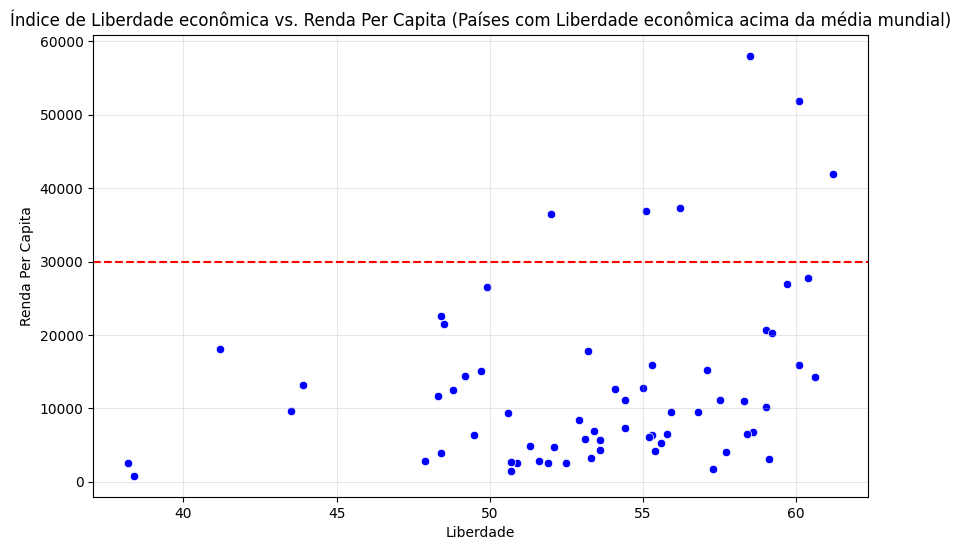

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xL', y='Y', data=abaixo_da_medL, color = 'blue')
plt.title('Índice de Liberdade econômica vs. Renda Per Capita (Países com Liberdade econômica acima da média mundial)')
plt.xlabel('Liberdade')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha na faixa de renda dos us$ 30 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

## A maioria dos países menos livres tem renda mais baixa.

## Visualizar agora para os países mais livres economicamente:

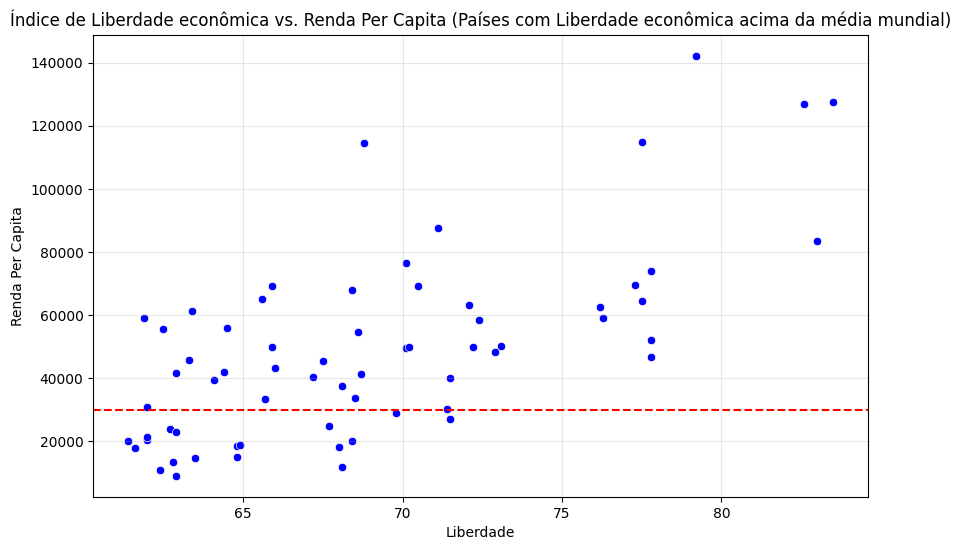

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xL', y='Y', data=acima_da_medL, color = 'blue')
plt.title('Índice de Liberdade econômica vs. Renda Per Capita (Países com Liberdade econômica acima da média mundial)')
plt.xlabel('Liberdade')
plt.ylabel('Renda Per Capita')
plt.grid(True, alpha = 0.3)

#vou colocar uma linha na faixa de renda dos us$ 30 mil
plt.axhline(y=30000, color='red', linestyle='--')
plt.show()

## Note que a quantidade de países acima dessa faixa do US$30 mil é bem maior para esse grupo de países. Porém, que também há vários países que mesmo livres, têm renda abaixo dessa faixa.

## Vamos tirar algumas conclusões acerca da relação entre Liberdade Econômica e Renda per Capita

----

## 3. Variância e Desvio Padrão

In [ ]:
desvio_padrao_Y = dados['Y'].std()

desvio_padrao_xI = dados['xI'].std()

desvio_padrao_xL = dados['xL'].std()


print("Desvio Padrão de Y:", desvio_padrao_Y)
print()
print("Desvio Padrão de xI:", desvio_padrao_xI)
print()
print("Desvio Padrão de xL:", desvio_padrao_xL)

Desvio Padrão de Y: 28960.040757091036

Desvio Padrão de xI: 14.108839798690616

Desvio Padrão de xL: 9.546156297088876


## Disparidade de renda entre os países com maior liberdade econômica

In [ ]:
acima_da_medL['Y']
dp_Y_acima_da_medL = acima_da_medL['Y'].std()
print("Desvio Padrão de Renda para os países com índice de liberdade econômica acima da média: US$",round(dp_Y_acima_da_medL))

Desvio Padrão de Renda para os países com índice de liberdade econômica acima da média: US$ 29656


### Veja que as diferenças de renda entre os países com maiores índices de liberdade econômica é alta. Dessa forma, pode-se notar que existe uma alta disparidade entre as rendas de países com elevada liberdade econômica.

## Vejamos o caso da disparidade de renda entre os países com menor liberdade econômica

In [ ]:
abaixo_da_medL['Y']
dp_Y_abaixo_da_medL = abaixo_da_medL['Y'].std()
print("Desvio Padrão de Renda para os países com índice de liberdade econômica abaixo da média: US$",round(dp_Y_abaixo_da_medL))

Desvio Padrão de Renda para os países com índice de liberdade econômica abaixo da média: US$ 12225


## Veja que a diferença de renda entre os menos livres é menor.

## 4. Correlação

In [ ]:
correlacao_Y_xI = dados[['Y', 'xI']].corr().iloc[0, 1]
correlacao_Y_xL = dados[['Y', 'xL']].corr().iloc[0, 1]
print("Correlação entre Renda e Inovação:", correlacao_Y_xI)
print()
print("Correlação entre Renda e Liberdade Econômica:", correlacao_Y_xL)
print()
correlação_xI_xL = dados[['xI', 'xL']].corr().iloc[0, 1]
print("Correlação entre Inovação e Liberdade Econômica:", correlação_xI_xL)

Correlação entre Renda e Inovação: 0.7723983547872895

Correlação entre Renda e Liberdade Econômica: 0.7573607448104864

Correlação entre Inovação e Liberdade Econômica: 0.7401587587124917


## Veja que existe uma correlação forte entre todas essas três variáveis.



---



---





---



## Distribuição e outras visualizações interessantes para verificar a inovação pelo mundo:

## Distribuição inovação ao redor mundo

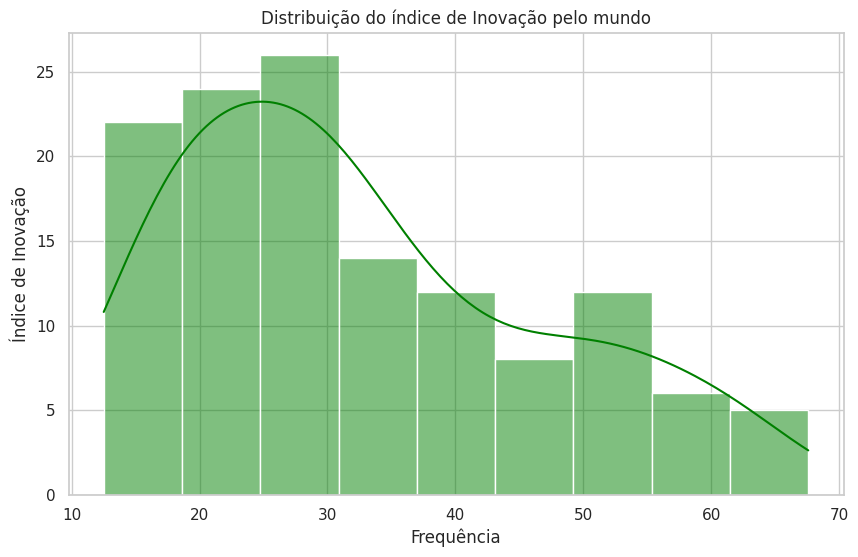

In [ ]:
#Crio uma figura
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x=dados['xI'], kde=True, color = 'green')
plt.title('Distribuição do índice de Inovação pelo mundo')
plt.xlabel('Frequência')
plt.ylabel('Índice de Inovação')
plt.show()

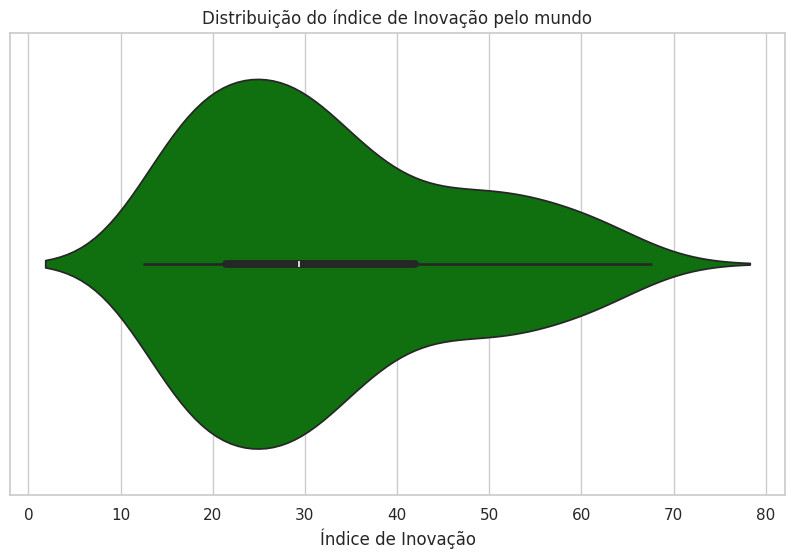

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=dados['xI'], color = 'green')
plt.title('Distribuição do índice de Inovação pelo mundo')
plt.xlabel('Índice de Inovação')
plt.show()

## Essas visualizações evidenciam que o índice de inovação pelo mundo está a maior parte concentrada ali na faixa entre 10 e 30 e poucos pontos. O Brasil por exemplo, tem um índice de inovação de 33,6 pontos no Índice. Estando em 48° posição.



---



## **Distribuição e outras visualizações interessantes para verificar a liberdade econômica pelo mundo:**

## Distribuição liberdade econômica ao redor mundo

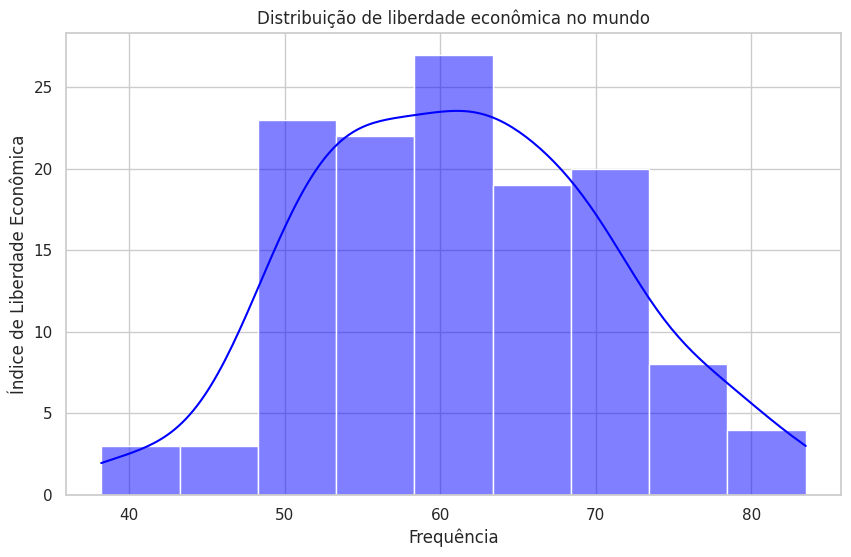

In [ ]:
#Crio uma figura
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(x=dados['xL'], kde=True, color = 'blue')
plt.title('Distribuição de liberdade econômica no mundo')
plt.xlabel('Frequência')
plt.ylabel('Índice de Liberdade Econômica')
plt.show()

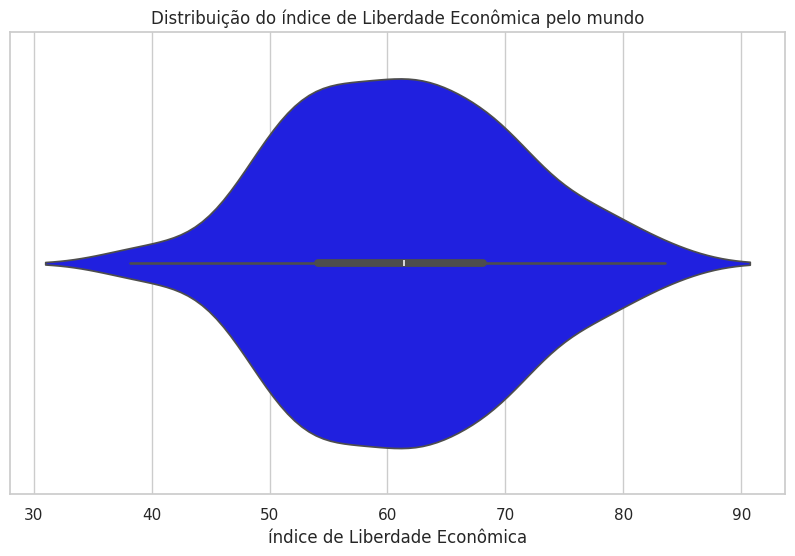

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x=dados['xL'], color = 'blue')
plt.title('Distribuição do índice de Liberdade Econômica pelo mundo')
plt.xlabel('índice de Liberdade Econômica')
plt.show()



---



---



## Modelo de Regressão:

In [ ]:
# Função para ajustar o modelo de regressão e retorná-lo
def ajustar_modelo(y, X):
    X = sm.add_constant(X)  # Adicionar constante (intercepto) ao modelo
    modelo = sm.OLS(y, X).fit()
    return modelo

In [ ]:
# 1. Regressão: Inovação (xI) vs. Renda (Y)
modelo_inovacao = ajustar_modelo(dados['Y'], dados['xI'])
print("Regressão: Inovação (xI) vs. Renda (Y)")
print(modelo_inovacao.summary())

Regressão: Inovação (xI) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           8.38e-27
Time:                        18:24:44   Log-Likelihood:                -1449.3
No. Observations:                 129   AIC:                             2903.
Df Residuals:                     127   BIC:                             2908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2

## Gráfico dos dados com a linha de regressão

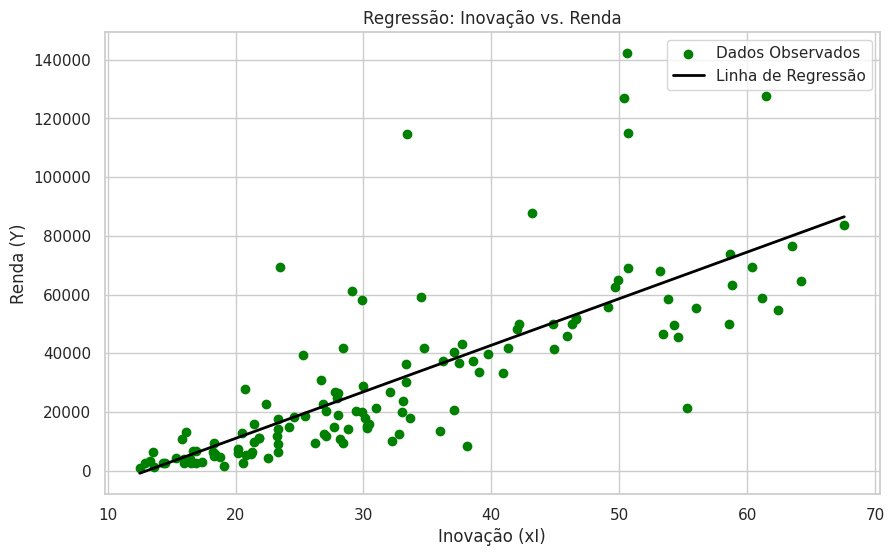

In [ ]:
# Dados para plotagem da linha de regressão
x_range = np.linspace(dados['xI'].min(), dados['xI'].max(), 100)
y_pred = modelo_inovacao.predict(sm.add_constant(x_range))


# Plotagem da curva de regressão
plt.figure(figsize=(10, 6))
plt.scatter(dados['xI'], dados['Y'], color='green', label='Dados Observados')  # Pontos de dados
plt.plot(x_range, y_pred, color='black', linewidth=2, label='Linha de Regressão')  # Linha de regressão
plt.xlabel('Inovação (xI)')
plt.ylabel('Renda (Y)')
plt.title('Regressão: Inovação vs. Renda')
plt.legend()
plt.grid(True)
plt.show()

## Interpretando os resultados da Regressão Simples Inovação vs. Renda per Capita ppc:
### No modelo, a variável Índice de Inovação (xI) apresenta um coeficiente positivo significativo de 1585.4378 (p < 0.001), indicando que, para cada unidade adicional de Inovação, a renda per capita aumenta em média aproximadamente em US$ 1585. Esse coeficiente revela a magnitude e a direção da relação entre Inovação e Renda, demonstrando que níveis mais altos de inovação estão associados a aumentos substanciais na renda per capita.

### O R² ajustado é de 0.593, o que significa que aproximadamente 59.3% da variabilidade na renda per capita pode ser explicada pela variável Inovação dentro do modelo utilizado. Em outras palavras, cerca de 59.3% das diferenças observadas na renda per capita entre os países ou regiões estudadas podem ser atribuídas às variações na Inovação, após ajustar para o número de preditores no modelo. Esse valor de R² ajustado indica um nível relativamente alto de explicação da variabilidade, sugerindo que a Inovação é um fator crucial para a determinação da renda per capita, embora outros fatores também possam influenciar significativamente e devam ser considerados para uma análise mais completa.

## Regressão Liberdade Econômica vs. Renda per Capita PPC

In [ ]:
# 2. Regressão: Liberdade Econômica (xL) vs. Renda (Y)
modelo_liberdade = ajustar_modelo(dados['Y'], dados['xL'])
print("\nRegressão: Liberdade Econômica (xL) vs. Renda (Y)")
print(modelo_liberdade.summary())


Regressão: Liberdade Econômica (xL) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.89e-25
Time:                        18:25:01   Log-Likelihood:                -1452.9
No. Observations:                 129   AIC:                             2910.
Df Residuals:                     127   BIC:                             2915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

## Visualizar agora a regressão xL vs Y

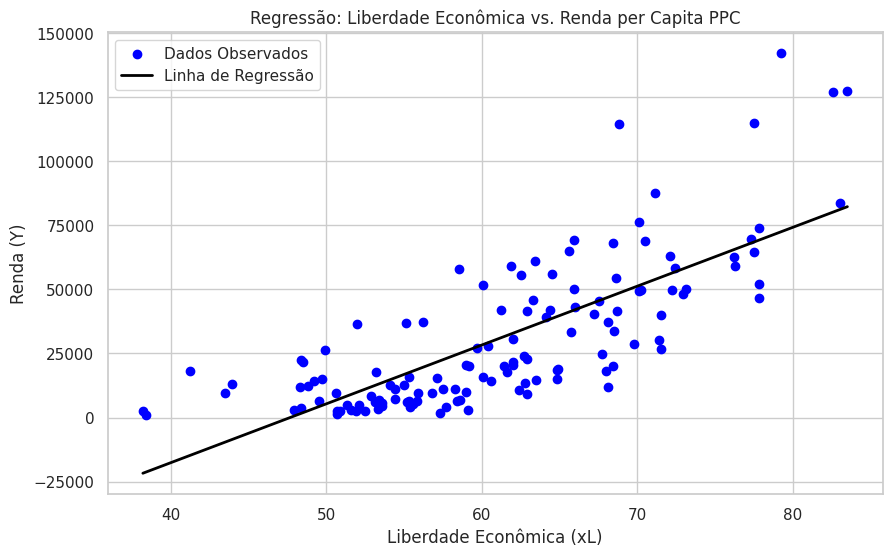

In [ ]:
# Dados para plotagem da linha de regressão
x2_range = np.linspace(dados['xL'].min(), dados['xL'].max(), 100)
y2_pred = modelo_liberdade.predict(sm.add_constant(x2_range))

# Plotagem da curva de regressão
plt.figure(figsize=(10, 6))
plt.scatter(dados['xL'], dados['Y'], color='blue', label='Dados Observados')
plt.plot(x2_range, y2_pred, color='black', linewidth=2, label='Linha de Regressão')
plt.xlabel('Liberdade Econômica (xL)')
plt.ylabel('Renda (Y)')
plt.title('Regressão: Liberdade Econômica vs. Renda per Capita PPC')
plt.legend()
plt.grid(True)
plt.show()


## Interpretando os resultados da Regressão Simples Liberdade Econômica vs. Renda per Capita ppc:
### A variável Liberdade Econômica (xL) mostra um coeficiente positivo significativo de 2297.5947 (p < 0.001), indicando que, para cada unidade adicional de Liberdade Econômica, a renda per capita aumenta em média US$2297. Esse coeficiente reflete a magnitude e a direção da associação entre Liberdade Econômica e Renda, demonstrando que maiores níveis de liberdade econômica tendem a resultar em maiores níveis de renda per capita.

### O R² ajustado é de 0.57, o que significa que aproximadamente 57% da variabilidade na renda per capita pode ser explicada pela variável Liberdade Econômica dentro do modelo utilizado. Esse valor de R² ajustado (coeficiente de determinação) um nível relativamente alto de explicação da variabilidade, sugerindo que a Liberdade Econômica é um fator crucial para a determinação da renda per capita, embora outros fatores também possam influenciar significativamente e devam ser considerados para uma análise mais completa.



---



## Regressão Múltipla:

In [ ]:
# 3. Regressão: Inovação (xI) + Liberdade Econômica (xL) vs. Renda (Y)
modelo_inovacao_liberdade = ajustar_modelo(dados['Y'], dados[['xI', 'xL']])
print("\nRegressão: Inovação (xI) + Liberdade Econômica (xL) vs. Renda (Y)")
print(modelo_inovacao_liberdade.summary())


Regressão: Inovação (xI) + Liberdade Econômica (xL) vs. Renda (Y)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.69e-31
Time:                        18:55:08   Log-Likelihood:                -1435.8
No. Observations:                 129   AIC:                             2878.
Df Residuals:                     126   BIC:                             2886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

## Gráfico da Regressão Múltipla:

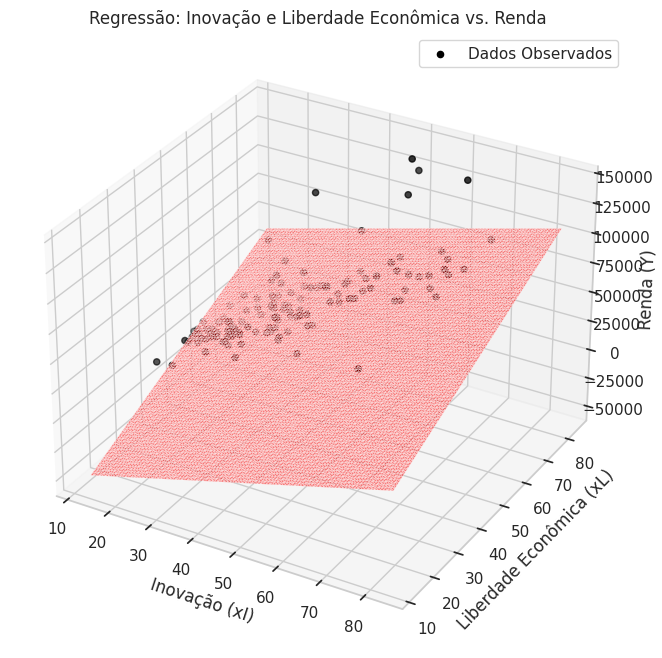

In [ ]:
# Dados para plotagem da linha de regressão
x3_range = np.linspace(dados[['xI', 'xL']].min().min(), dados[['xI', 'xL']].max().max(), 100)
x3_grid = np.meshgrid(x3_range, x3_range)
x3_pred = modelo_inovacao_liberdade.predict(sm.add_constant(np.stack(x3_grid, axis=-1).reshape(-1, 2)))

# Plotagem da curva de regressão
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dados['xI'], dados['xL'], dados['Y'], c='black', marker='o', label='Dados Observados')
ax.plot_trisurf(np.ravel(x3_grid[0]), np.ravel(x3_grid[1]), np.ravel(x3_pred), color='red', alpha=0.5, linewidth=0.2)

ax.set_xlabel('Inovação (xI)')
ax.set_ylabel('Liberdade Econômica (xL)')
ax.set_zlabel('Renda (Y)')
ax.set_title('Regressão: Inovação e Liberdade Econômica vs. Renda')

plt.legend()
plt.show()

## Interpretando os dados da regressão múltipla entre inovação + liberdade econômica vs. Renda per capita ppc:
## Aqui estão os principais pontos interpretativos:

## 1 - Coeficientes (coef): São os valores estimados para os coeficientes da regressão. No seu caso:
## - Para a constante (intercepto): -76530 (aproximadamente -76,530).
## - Para xI (Inovação): 961.6140.
## - Para xL (Liberdade Econômica): 1245.6609.

## 2 - P>|t|: Indica o valor p associado ao teste de hipótese nula de que o coeficiente é igual a zero (nenhum efeito). Valores p pequenos (menores que 0.05) indicam que é improvável que o coeficiente seja zero, sugerindo uma relação estatisticamente significativa com a variável de resposta (Renda, Y).

## 3 - R-quadrado (R-squared): Mede a proporção da variabilidade na variável dependente (Renda, Y) que é explicada pelas variáveis independentes (Inovação e Liberdade Econômica). Um R-quadrado de 0.673 significa que aproximadamente 67.3% da variabilidade na Renda é explicada pelas variáveis explicativas no modelo.

## 4 - F-statistic: Teste de significância global do modelo. Um valor alto (129.6 neste caso) com um valor p baixo (2.69e-31) sugere que pelo menos uma das variáveis explicativas é significativa para explicar a variabilidade em Y.

## 5 - Omnibus, Skewness, Kurtosis: Testes de normalidade dos resíduos. Aqui, o valor baixo de Prob(Omnibus) (0.000) sugere que os resíduos não são normalmente distribuídos, o que pode indicar que o modelo pode não capturar completamente todos os padrões nos dados. Isso é um problema! Vou tentar os meios para resolver isso aqui.

## Em resumo, o modelo indica que tanto a Inovação quanto a Liberdade Econômica têm impacto significativo na variável de resposta Renda, com um bom ajuste geral do modelo (R-quadrado de 0.673).

## A seguir preciso testar as hipóteses do modelo de regressão linear para tornar o modelo mais robusto e estatísticamente mais preciso.



---



---



---



## Teste das Hipóteses do Modelo de Regressão Linear:

## Vou testar uma hipótese do Modelo de Regressão Linear chamada de Multicolinearidade - ela pressupõe que pode ocorrer um viés no modelo caso aja uma grande correlação linear entre as variáveis explicativas
## O não cumprimento dessa hipótese, falando resumidamente, é que o não cumprimento dele pode tornar muitas vezes as estimativas dos coeficientes dos parâmetros (β's) insignificantes.

## Carrego essa funcionalidade da biblioteca statmodels para testar se a hipótese de Multicolinearidade está sendo cumprida

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df = pd.DataFrame(dados)

# Adicione a constante ao modelo
X = sm.add_constant(df[['xI', 'xL']])

# Calcula o VIF para cada variável explicativa
vif_data = pd.DataFrame()
vif_data['Variavel'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variavel        VIF
0    const  55.638083
1       xI   2.211582
2       xL   2.211582


## Análise do resultado da VIF:

## A constante (intercepto) apresenta um VIF de 55.638083. Isso indica que há uma alta correlação entre a constante e as outras variáveis explicativas no modelo.
## No entanto, perceba que os VIFs das variáveis explicativas xI e xL, que são de aproximadamente 2.21 cada, estão abaixo de 5. VIFs abaixo de 5 geralmente indicam que a multicolinearidade não é um problema significativo para essas variáveis, o que é um bom sinal.
## Com base nesse cálculo pôde-se concluir que a Multicolinearidade não é um problema dos grandes aqui.

## Hipótese de normalidade dos resíduos:

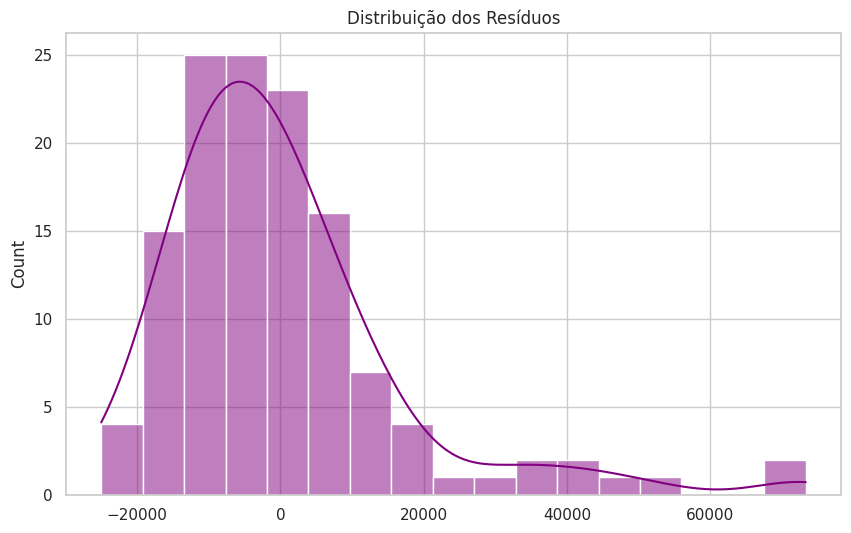

In [ ]:
# vou testar se os resíduos seguem uma distribuição normal

#Obtenho os resíduos
residuos = modelo_inovacao_liberdade.resid

#Coloco ele em um gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color = 'purple')
plt.title('Distribuição dos Resíduos')
plt.show()

## Olhando a forma da Distribuição, observamos que ela parece estar levemente assimétrica para a direita (positiva). Isso significa que há mais resíduos positivos (maiores que zero) do que resíduos negativos (menores que zero).

## Veja abaixo uma distribuição assimétrica para a direita:

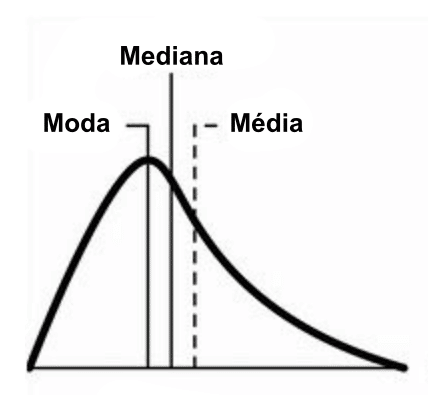

Nela: "o pico da distribuição está do lado esquerdo e os dados se espalham em direção ao lado positivo da escala, criando uma cauda que se estende para a direita. A moda é a menor medida descritiva (sempre a encontramos no ponto mais alto da curva), em seguida temos a mediana e a média, que é maior por ser sensível aos valores extremos positivos. Nessa situação os dados estão concentrados abaixo da média." Fonte: https://blog.proffernandamaciel.com.br/assimetria-e-curtose-dos-dados/

In [ ]:
from scipy.stats import shapiro

In [ ]:
#Teste de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print("Estatística de teste:", shapiro_test.statistic)
print("Valor p:", shapiro_test.pvalue)

# Interpretação do teste
alpha = 0.10
if shapiro_test.pvalue > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0)")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0)")

Estatística de teste: 0.8304557800292969
Valor p: 6.930986340414336e-11
Os resíduos não seguem uma distribuição normal (rejeitamos H0)


## Devemos então concluir que o Modelo em questão não segue o pressuposto exigido pelo modelo de Regressão linear Múltiplo de Distribuição normal dos resíduos.

## Vou realizar uma transformação logarítmica para tentar lidar com isso.

## Por que usar a transformação logarítmica?

## - Normalidade dos Resíduos: A transformação logarítmica pode ajudar a normalizar a distribuição dos resíduos, especialmente se os dados originais são positivamente assimétricos (com uma cauda longa à direita).
## -Redução da Heterocedasticidade: Transformar as variáveis pode ajudar a estabilizar a variância dos resíduos ao longo da faixa de valores das variáveis preditoras.
## - Linearização das Relações: Em muitos casos, as relações entre variáveis podem ser não-lineares. Tomar o logaritmo pode linearizar essas relações, facilitando o ajuste do modelo.

## Como a transformação foi aplicada?

## - Variável Dependente (Y): A variável dependente Y foi transformada para log_Y usando a função logarítmica natural (log⁡(Y)log(Y)).
## - Variáveis Independentes (xI e xL): As variáveis independentes xI e xL também foram transformadas para log_xI e log_xL, respectivamente, usando a função logarítmica natural (log⁡(xI)log(xI) e log⁡(xL)log(xL)).

## Além disso, vou alterar o nível de significância (α) para 0.10 em vez de 0.05, o que significa que estou tornando o teste menos rigoroso, aumentando a probabilidade de não rejeitar a hipótese nula (H0).

## Vamos lá:

## Transformação logarítmica:

In [ ]:
dados['log_Y'] = np.log(dados['Y'])
dados['log_xI'] = np.log(dados['xI'])
dados['log_xL'] = np.log(dados['xL'])

## Novo modelo de regressão com os dados transformados:

In [ ]:
# vou fazer um modelo de regressão múltiplo a partir desses dados tranformados:
reg = sm.OLS(dados['log_Y'], sm.add_constant(dados[['log_xI', 'log_xL']]))
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.34e-42
Time:                        19:20:03   Log-Likelihood:                -96.356
No. Observations:                 129   AIC:                             198.7
Df Residuals:                     126   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6553      1.377     -2.655      0.0

In [ ]:
# Obter os resíduos do novo modelo ajustado
residuos_transformados = res.resid

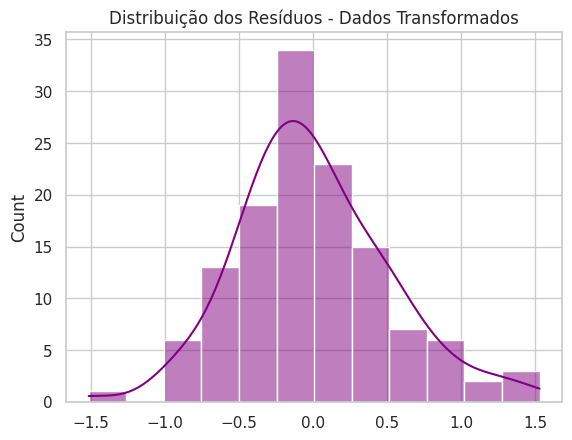

In [ ]:
# Visualizar a distribuição dos resíduos
sns.histplot(residuos_transformados, kde=True, color = 'purple')
plt.title('Distribuição dos Resíduos - Dados Transformados')
plt.show()

## Parece bem próxima de uma distribuição normal!

## Vamos realizar outro teste de Shapiro, que é o melhor teste para detectar essse problema:

In [ ]:
# Realizar o teste de Shapiro-Wilk nos resíduos transformados
shapiro_test_transformados = shapiro(residuos_transformados)
print("Estatística de teste:", shapiro_test_transformados.statistic)
print("Valor p:", shapiro_test_transformados.pvalue)

# Interpretação do teste com nível de significância = 0.10
alpha = 0.10
if shapiro_test_transformados.pvalue > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0) 🙌😎")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0)😢")

Estatística de teste: 0.9835441708564758
Valor p: 0.12068634480237961
Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0) 🙌😎


## Teste de Kolmogorov-Smirnov, que é menos exato e pode errar diante de uma amostra muito grande:

In [ ]:
from scipy.stats import kstest

# Teste de Kolmogorov-Smirnov
ks_test = kstest(residuos_transformados, 'norm')
print('Teste de Kolmogorov-Smirnov')
print('Estatística:', ks_test.statistic)
print('Valor p:', ks_test.pvalue)

# Interpretação do teste
if ks_test.pvalue > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos H0) 🙌😎")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0) 😢")

Teste de Kolmogorov-Smirnov
Estatística: 0.20706075361763857
Valor p: 2.5003113483804914e-05
Os resíduos não seguem uma distribuição normal (rejeitamos H0) 😢


## Conclusão sobre a hipótese de normalidade:

## Com base nos resultados e nas considerações acima, você pode concluir que:

## -Normalidade Aproximada: Os resíduos parecem seguir uma distribuição aproximadamente normal após a transformação logarítmica, conforme indicado pelo teste de Shapiro-Wilk e pela visualização do gráfico de Distribuição.
## -Resultados Confiáveis: O uso de erros padrão robustos melhora a confiabilidade dos coeficientes de regressão, mesmo que os resíduos não sejam perfeitamente normais.
## -Teste KS: A rejeição da normalidade pelo teste de Kolmogorov-Smirnov pode ser uma consequência de sua sensibilidade em amostras grandes (a amostra é 129 países, de um total de 195 países no mundo) e deve ser interpretada com cautela.

## Portanto, parece razoável prosseguir com a análise e inferências com base no modelo transformado, dado que a aproximação à normalidade foi alcançada e as ferramentas estatísticas apropriadas foram utilizadas para tratar quaisquer pequenas violações das suposições. Além disso, é importante continuar monitorando a adequação do modelo e, se necessário, explorar outras transformações ou técnicas de modelagem.

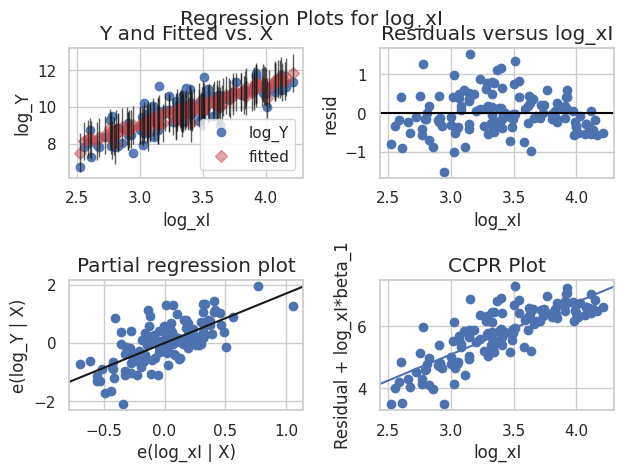

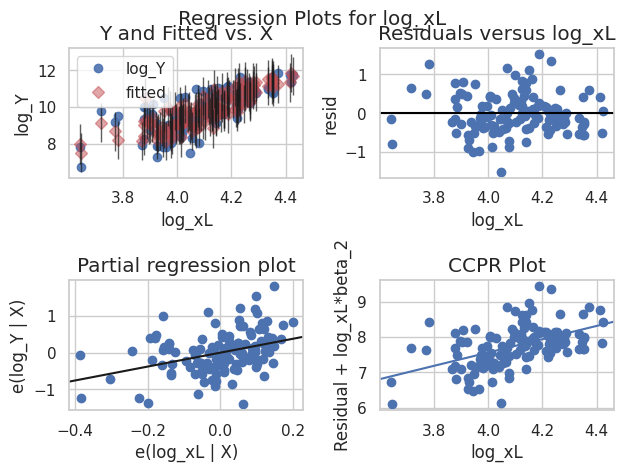

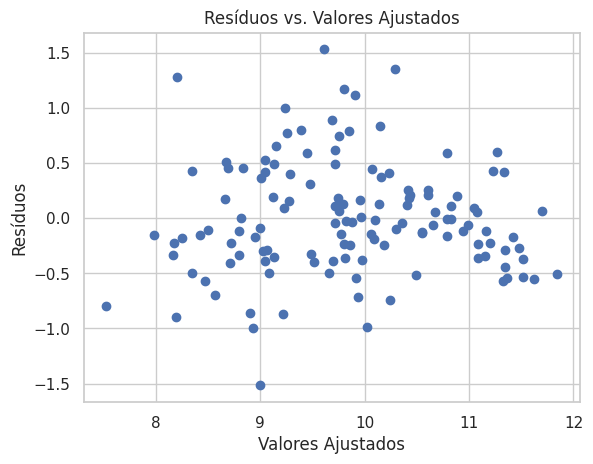

Teste de Breusch-Pagan
Estatística: 4.641040655721627
Valor p: 0.09822246442083096


In [ ]:
import statsmodels.api as sm

# Gráficos de diagnóstico do modelo ajustado
sm.graphics.plot_regress_exog(res, 'log_xI')
sm.graphics.plot_regress_exog(res, 'log_xL')
plt.show()

# Plotando resíduos versus valores ajustados para verificar homocedasticidade
plt.scatter(res.fittedvalues, residuos_transformados)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()

# Teste de Breusch-Pagan para homocedasticidade
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuos_transformados, res.model.exog)
print('Teste de Breusch-Pagan')
print('Estatística:', bp_test[0])
print('Valor p:', bp_test[1])


## Com base nos gráficos e no teste de Breusch-Pagan, podemos concluir que o modelo de regressão linear é um bom modelo para os dados, após a transformação logarítmica, tornando-o mais preciso. A relação entre a variável dependente (log_Y) e as variáveis ​​independentes (log_xI e log_xL) é linear e homocedástica.

## O trunfo, foi ajustar os dados logaritmicamente. Viva o Log!
## Mas também perceba que esse modelo tem suas limitações.

## Nova Modelagem de Regressão Múltipla:

In [88]:
import statsmodels.api as sm

# Ajustar o modelo com erros padrão robustos à heterocedasticidade
reg = sm.OLS(dados['log_Y'], sm.add_constant(dados[['log_xI', 'log_xL']]))
res_robust = reg.fit(cov_type='HC3')

# Exibir o resumo do modelo ajustado com erros padrão robustos
print(res_robust.summary())


                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     238.9
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           1.35e-43
Time:                        20:01:45   Log-Likelihood:                -96.356
No. Observations:                 129   AIC:                             198.7
Df Residuals:                     126   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6553      1.585     -2.306      0.0



---



---



# Conclusão do Trabalho:


---



## A despeito de todas as limitações desse estudo, tem-se que os resultados obtidos destacam que tanto a Inovação quanto a Liberdade Econômica têm impactos positivos significativos na determinação da renda, com a inovação aparentando ter um impacto ainda maior. Este estudo também revelou que a combinação desses dois fatores no mesmo modelo explica de forma mais abrangente a variabilidade na renda, evidenciando a importância desses elementos sendo utilizados em conjunto e de forma inteligente para a dinâmica econômica.

## Os dados corroboram a ideia de que a inovação é crucial e que um ambiente econômico baseado no livre mercado é fundamental para um país que deseja melhorar o nível de renda per capita. Esses resultados sustentam o ideal liberal de que a liberdade econômica é relevante e tem um impacto predominantemente positivo para uma nação. Além disso, reforçam um conceito amplamente aceito entre os economistas sobre os efeitos benéficos da inovação na economia.

## A modelagem estatística ficou interessante e a despeito de suas limitações parecem corroborar a ideia principal obtida através desse trabalho. Colocando essa modelagem no contexto geral e todas as demonstrações feitas por esse trabalho, concluímos que sim: essa modelagem corrobora que inovação e liberdade econômicas combinadas na média implicam aumento de renda per capita, considerando a paridade de poder compra, em um país.

## Portanto, os achados deste breve estudo são significativos e podem gerar insights valiosos para a elaboração de políticas públicas e estratégias de desenvolvimento que visem aumentar a prosperidade econômica.

# **END.**